In [2]:
# if running without local install
import sys, os
sys.path.append(os.path.abspath("..\\.."))

import GeoDataKit.geoplot as gp

import numpy as np
import pandas as pd

## Loading dataset
The dataset contains volcanic output locations from the eastern Velay, France.

Rocktype gives the type of rock of the volcanic output (felsic or mafic), points flagged as others correspond to intermediate rocktypes or maars.

In [16]:
data = pd.read_csv ("Pereira_etal_Velay.csv")

## Hough Study

### All points

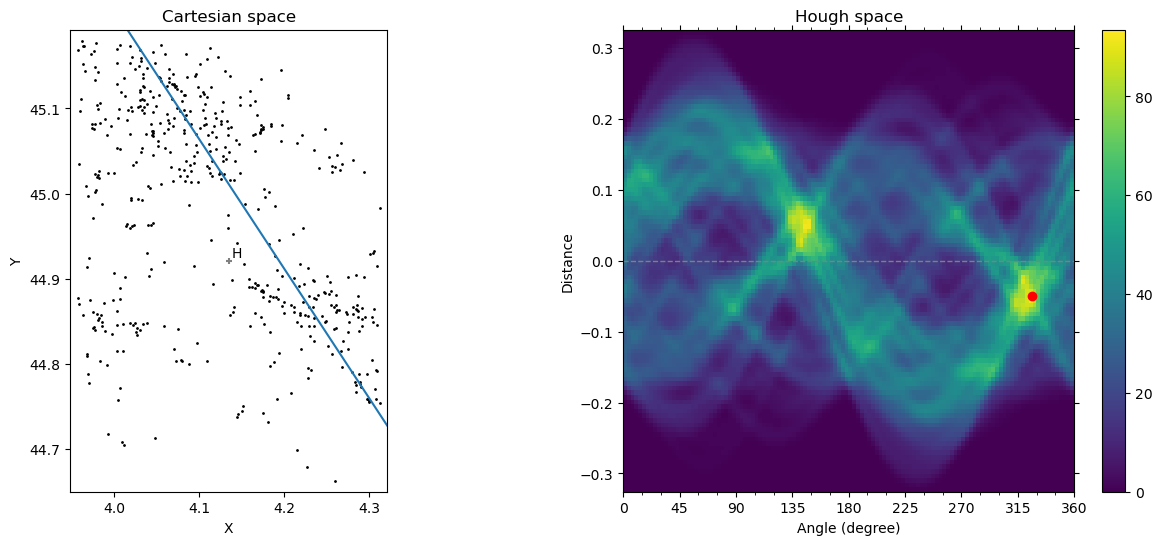

In [43]:
velay_data = data[["x","y"]].to_numpy().T
hgt = gp.HoughTransform(velay_data, update_area=True)
#hgt.select_data_point(2)
hgt.hough.update_accumulator(kernel_type="gaussian",sigma=0.01)
hgp = gp.HoughPlot(hgt)
hgp.plot(show_selected=True)

### Felsic outputs

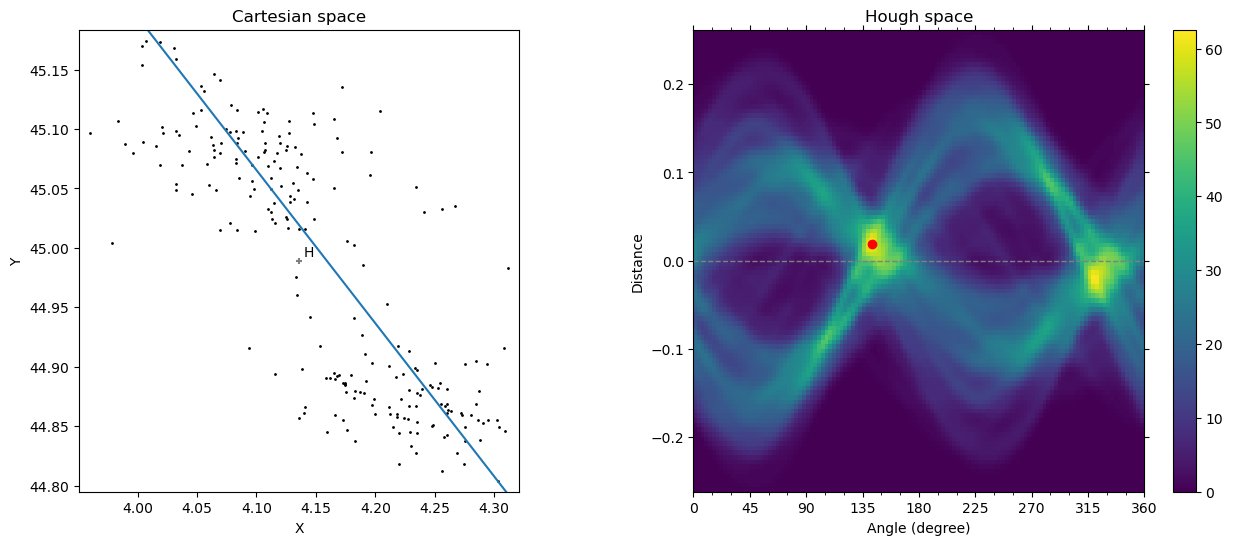

In [42]:
felsic_data = data[["x","y"]].loc[data["RockType"]=="Felsic"].to_numpy().T
hgt = gp.HoughTransform(felsic_data, update_area=True)
#hgt.select_data_point(2)
hgt.hough.update_accumulator(kernel_type="gaussian",sigma=0.01)
hgp = gp.HoughPlot(hgt)
hgp.plot(show_selected=False,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)

### Mafic outputs

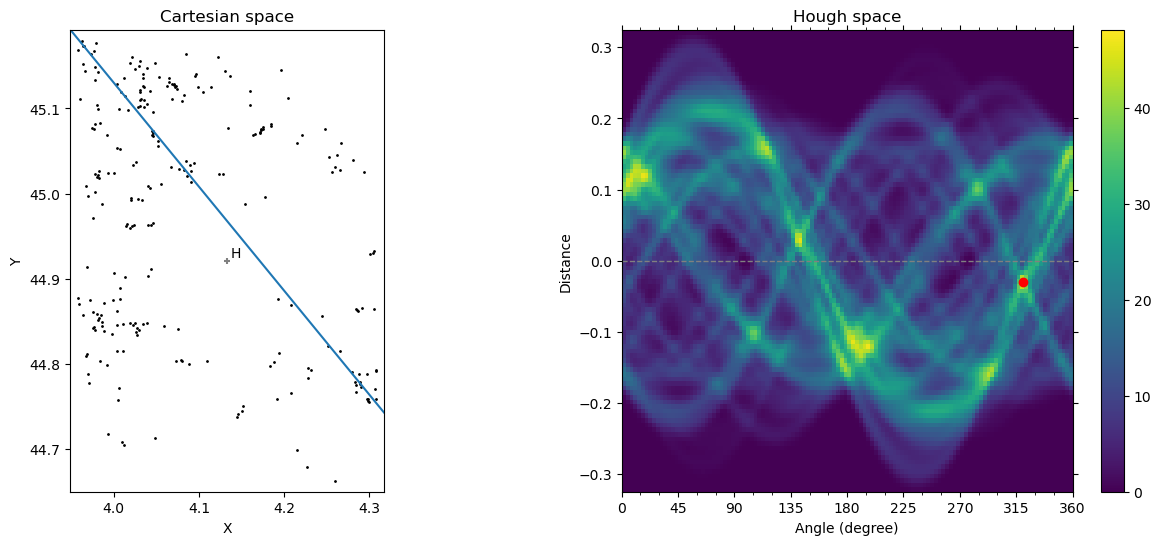

In [41]:
mafic_data = data[["x","y"]].loc[data["RockType"]=="Mafic"].to_numpy().T
hgt = gp.HoughTransform(mafic_data, update_area=True)
#hgt.select_data_point(2)
hgt.hough.update_accumulator(kernel_type="gaussian",sigma=0.01)
hgp = gp.HoughPlot(hgt)
hgp.plot(show_selected=False,
         show_circle=True,show_hough_point=True,show_triangle=True,
                      show_vector=True)

## Interactive map

In [37]:
import ipywidgets as widgets
hgt = gp.HoughTransform(velay_data,update_area=True)
@widgets.interact(
    hgt=widgets.fixed(hgt),
    selected_index = widgets.IntSlider(value=0,min=0,max=n,step=1,continuous_update=False),
    selected_azimuth = widgets.IntSlider(value=45,min=0,max=360,step=1,continuous_update=False),
    azimuth = widgets.IntSlider(value=45,min=0,max=360,step=1,continuous_update=False),
    dist = widgets.FloatSlider(value=0,min=-hgt.hough.distance_max,max=hgt.hough.distance_max,step=0.1,continuous_update=False),
    sigma = widgets.FloatSlider(value=0.03,min=0.01,max=1,step=0.01,continuous_update=False),
    kernel = gp.kernel_dict.keys(),
    show_construction = [False,True]
)
def interact_hough(hgt,selected_index,selected_azimuth,azimuth,dist,sigma,kernel,show_construction):
    hgp = gp.HoughPlot(hgt)
    hgt.hough.update_accumulator(kernel_type=kernel,sigma=sigma)
    hgp.plot(show_selected=True,index=selected_index,az=selected_azimuth,
            show_circle=show_construction, show_triangle=show_construction,
            show_hough_point=show_construction, show_vector=show_construction)
    hgp.plot_manual(azimuth,dist)

interactive(children=(IntSlider(value=0, continuous_update=False, description='selected_index', max=12), IntSl…

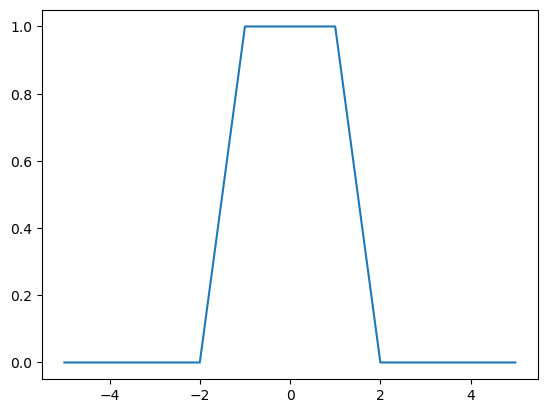

In [9]:
kernel = gp.HoughKernel.kernel(type="line",width=2)
delta = np.arange(-5,5,0.01)
gp.plt.plot(delta,kernel(delta))

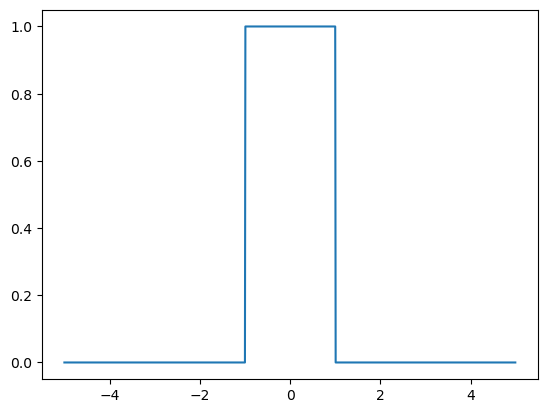

In [10]:
kernel = HoughKernel.kernel(type="line",width=2,antialiase=False)
delta = np.arange(-5,5,0.01)
plt.plot(delta,kernel(delta))

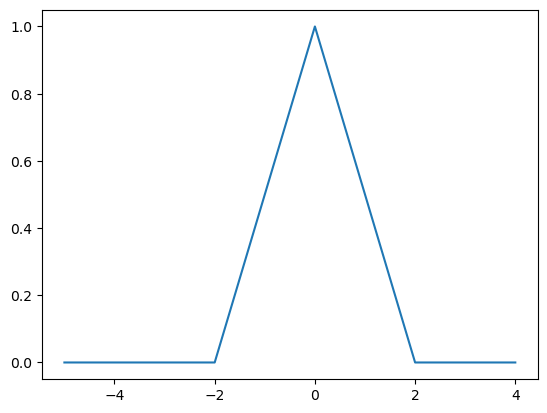

In [11]:
kernel = HoughKernel.kernel(type="triangle",sigma=2)
delta = np.arange(-5,5)
plt.plot(delta,kernel(delta))

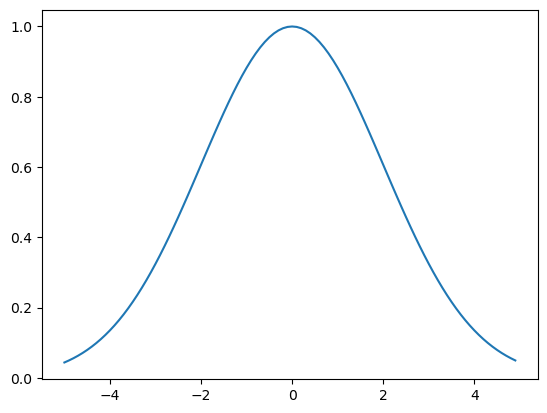

In [12]:
kernel = HoughKernel.kernel(type="gaussian",sigma=2)
delta = np.arange(-5,5,0.1)
plt.plot(delta,kernel(delta))